In [202]:
import pandas as pd
import numpy as np

In [203]:
df = pd.read_csv('./ETH_1h-datetime.csv')
df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [204]:
df['Date'].day_name()

AttributeError: 'Series' object has no attribute 'day_name'

In [205]:
## Somehow not working as expected
date_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
df_datetime = pd.read_csv('./ETH_1h-datetime.csv', parse_dates=['Date'], date_parser=date_parser)
df_datetime


/var/folders/c8/wy8zqpfn5z3_zvhncw54tmr80000gn/T/ipykernel_17194/4152645453.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_datetime = pd.read_csv('./ETH_1h-datetime.csv', parse_dates=['Date'], date_parser=date_parser)


AttributeError: module 'pandas' has no attribute 'datetime'

In [206]:
df = pd.read_csv('./ETH-USD-2year-datetime.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-11,4635.453613,4778.059082,4580.990234,4730.384277,4730.384277,17933201129
1,2021-11-12,4724.306641,4808.738770,4510.920410,4667.115234,4667.115234,18316060208
2,2021-11-13,4666.719238,4702.115234,4582.180664,4651.460449,4651.460449,14457436261
3,2021-11-14,4648.632813,4689.842773,4516.935547,4626.358887,4626.358887,12172962219
4,2021-11-15,4627.090820,4764.636230,4546.599121,4557.503906,4557.503906,16275851299
...,...,...,...,...,...,...,...
726,2023-11-07,1900.599731,1907.561401,1852.790894,1888.124268,1888.124268,9203228152
727,2023-11-08,1887.119019,1904.546265,1874.545654,1889.322388,1889.322388,6751627017
728,2023-11-09,1888.940308,2130.885254,1884.204346,2120.561035,2120.561035,24709695029
729,2023-11-10,2121.067383,2134.691406,2068.134277,2078.289795,2078.289795,14740624457


In [207]:
df['Date']

0      2021-11-11
1      2021-11-12
2      2021-11-13
3      2021-11-14
4      2021-11-15
          ...    
726    2023-11-07
727    2023-11-08
728    2023-11-09
729    2023-11-10
730    2023-11-11
Name: Date, Length: 731, dtype: object

In [208]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Date']

0     2021-11-11
1     2021-11-12
2     2021-11-13
3     2021-11-14
4     2021-11-15
         ...    
726   2023-11-07
727   2023-11-08
728   2023-11-09
729   2023-11-10
730   2023-11-11
Name: Date, Length: 731, dtype: datetime64[ns]

In [209]:
df.loc[0, 'Date'].day_name()

'Thursday'

In [210]:
df['DayName'] = df['Date'].dt.day_name()
df

,Date,Open,High,Low,Close,Adj Close,Volume,DayName
0,2021-11-11,4635.453613,4778.059082,4580.990234,4730.384277,4730.384277,17933201129,Thursday
1,2021-11-12,4724.306641,4808.738770,4510.920410,4667.115234,4667.115234,18316060208,Friday
2,2021-11-13,4666.719238,4702.115234,4582.180664,4651.460449,4651.460449,14457436261,Saturday
3,2021-11-14,4648.632813,4689.842773,4516.935547,4626.358887,4626.358887,12172962219,Sunday
4,2021-11-15,4627.090820,4764.636230,4546.599121,4557.503906,4557.503906,16275851299,Monday
...,...,...,...,...,...,...,...,...
726,2023-11-07,1900.599731,1907.561401,1852.790894,1888.124268,1888.124268,9203228152,Tuesday
727,2023-11-08,1887.119019,1904.546265,1874.545654,1889.322388,1889.322388,6751627017,Wednesday
728,2023-11-09,1888.940308,2130.885254,1884.204346,2120.561035,2120.561035,24709695029,Thursday
729,2023-11-10,2121.067383,2134.691406,2068.134277,2078.289795,2078.289795,14740624457,Friday


In [211]:
df['Date'].min()

Timestamp('2021-11-11 00:00:00')

In [212]:
df['Date'].max()

Timestamp('2023-11-11 00:00:00')

In [213]:
# date_delta
df['Date'].max() - df['Date'].min()

Timedelta('730 days 00:00:00')

In [214]:
date_filter = (df['Date'] > pd.to_datetime('2022-12-31'))

df.loc[date_filter]

,Date,Open,High,Low,Close,Adj Close,Volume,DayName
416,2023-01-01,1196.713623,1203.475342,1192.885376,1200.964844,1200.964844,2399674550,Sunday
417,2023-01-02,1201.103271,1219.860596,1195.214966,1214.656616,1214.656616,3765758498,Monday
418,2023-01-03,1214.744019,1219.095337,1207.491577,1214.778809,1214.778809,3392972131,Tuesday
419,2023-01-04,1214.718628,1264.807495,1213.168823,1256.526611,1256.526611,6404416893,Wednesday
420,2023-01-05,1256.484619,1258.571533,1245.173096,1250.438599,1250.438599,4001786456,Thursday
...,...,...,...,...,...,...,...,...
726,2023-11-07,1900.599731,1907.561401,1852.790894,1888.124268,1888.124268,9203228152,Tuesday
727,2023-11-08,1887.119019,1904.546265,1874.545654,1889.322388,1889.322388,6751627017,Wednesday
728,2023-11-09,1888.940308,2130.885254,1884.204346,2120.561035,2120.561035,24709695029,Thursday
729,2023-11-10,2121.067383,2134.691406,2068.134277,2078.289795,2078.289795,14740624457,Friday


In [215]:
df.set_index('Date', inplace=True)

In [216]:
df.loc['2022']

,Open,High,Low,Close,Adj Close,Volume,DayName
Date,,,,,,,
2022-01-01,3683.047119,3769.917969,3682.286621,3769.697021,3769.697021,9776191466,Saturday
2022-01-02,3769.298340,3836.161865,3727.357422,3829.564941,3829.564941,9881471548,Sunday
2022-01-03,3829.535645,3836.198730,3698.047607,3761.380371,3761.380371,12080777893,Monday
2022-01-04,3761.361572,3876.785156,3723.349854,3794.056641,3794.056641,14030925983,Tuesday
2022-01-05,3794.269043,3842.059814,3456.745361,3550.386963,3550.386963,18061338502,Wednesday
...,...,...,...,...,...,...,...
2022-12-27,1226.987061,1230.418091,1205.895630,1212.791626,1212.791626,4091530737,Tuesday
2022-12-28,1212.736572,1213.128906,1185.702148,1189.986084,1189.986084,4991669631,Wednesday
2022-12-29,1190.010132,1204.141602,1188.360229,1201.595337,1201.595337,4132233940,Thursday


In [224]:
df.loc['2023-01':'2023-01']

,Open,High,Low,Close,Adj Close,Volume,DayName
Date,,,,,,,
2023-01-01,1196.713623,1203.475342,1192.885376,1200.964844,1200.964844,2399674550,Sunday
2023-01-02,1201.103271,1219.860596,1195.214966,1214.656616,1214.656616,3765758498,Monday
2023-01-03,1214.744019,1219.095337,1207.491577,1214.778809,1214.778809,3392972131,Tuesday
2023-01-04,1214.718628,1264.807495,1213.168823,1256.526611,1256.526611,6404416893,Wednesday
2023-01-05,1256.484619,1258.571533,1245.173096,1250.438599,1250.438599,4001786456,Thursday
2023-01-06,1250.458984,1273.220337,1240.947510,1269.379028,1269.379028,4977252792,Friday
2023-01-07,1269.419800,1270.598267,1262.271118,1264.270386,1264.270386,2565213548,Saturday
2023-01-08,1264.181885,1287.359497,1260.226807,1287.359497,1287.359497,3495088905,Sunday
2023-01-09,1287.450806,1342.144165,1286.680786,1321.538940,1321.538940,7990438824,Monday


In [223]:
df.loc['2023-01':'2023-02']['Close'].mean()

1541.7696347118642

In [219]:
df.loc['2023-01-01']['High'].max()

1203.475342

In [220]:
df.loc['2023-01-01']['Low'].max()

1192.885376

In [227]:
# GET High values of each day 
each_day_highs = df['High'].resample(rule='D').max()

# - df['High']: This selects the 'High' column from the DataFrame df.
# - resample(): This is a method applied to a time series, typically a column with a datetime index. It allows you to change the frequency of the data.

# - 'D' is the resampling rule, indicating daily frequency. 
# You can use various frequency strings like 'D' for day, 'H' for hour, 'W' for week, etc.
# Ref: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects


# - mean() is an aggregation function that specifies how to handle the values in each new time bucket. 
# In this case, it calculates the mean of the values in each daily bucket.

each_day_highs

Date
2021-11-11    4778.059082
2021-11-12    4808.738770
2021-11-13    4702.115234
2021-11-14    4689.842773
2021-11-15    4764.636230
                 ...     
2023-11-07    1907.561401
2023-11-08    1904.546265
2023-11-09    2130.885254
2023-11-10    2134.691406
2023-11-11    2084.731934
Freq: D, Name: High, Length: 731, dtype: float64

In [226]:
%matplotlib inline

<Axes: xlabel='Date'>

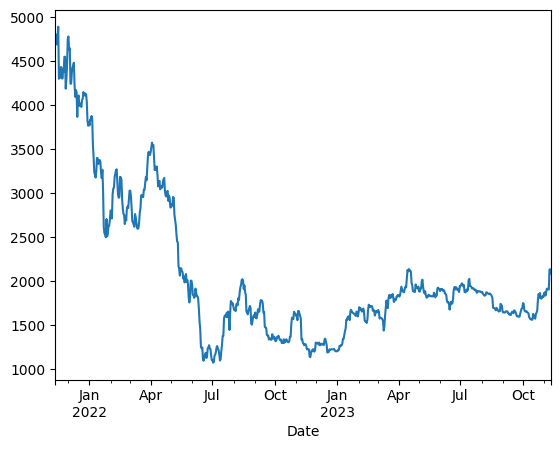

In [229]:
each_day_highs.plot()

In [234]:
df.resample(rule='W').agg({'High': 'max', 'Low': 'min', 'Close': 'mean', 'Volume': 'sum'})

# - resample(rule='W'): This part is resampling the DataFrame based on a weekly frequency ('W' stands for weekly). 
# It groups the data into weekly bins.

# - agg({'High': 'max', 'Low': 'min', 'Close': 'mean', 'Volume': 'sum'}): 
# This is using the .agg method to specify different aggregation functions for each column.

# - 'High': 'max': For the 'High' column, it calculates the maximum value within each weekly bin.
# - 'Low': 'min': For the 'Low' column, it calculates the minimum value within each weekly bin.
# - 'Close': 'mean': For the 'Close' column, it calculates the mean (average) value within each weekly bin.
# - 'Volume': 'sum': For the 'Volume' column, it calculates the sum of values within each weekly bin.

,High,Low,Close,Volume
Date,,,,
2021-11-14,4808.738770,4510.920410,4668.829712,62879659817
2021-11-21,4891.704590,3959.227783,4291.440639,137429429244
2021-11-28,4550.842285,3933.506592,4195.174386,141179727084
2021-12-05,4780.732422,3525.494141,4387.641811,186741981087
2021-12-12,4482.313965,3846.054443,4194.339181,152799880859
...,...,...,...,...
2023-10-15,1635.447876,1523.237549,1559.828997,32623896903
2023-10-22,1667.666626,1543.585083,1599.226004,39476937799
2023-10-29,1865.095215,1663.447998,1784.780936,66964766348


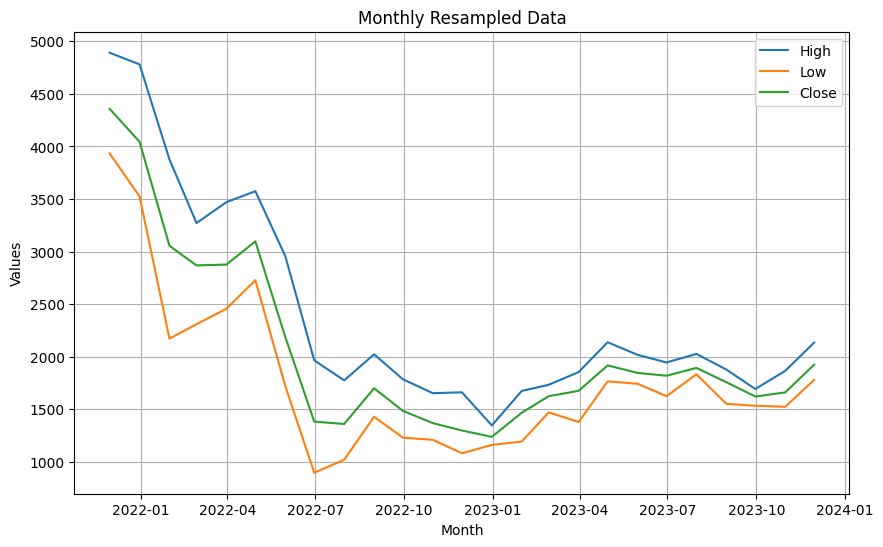

In [249]:
import matplotlib.pyplot as plt
resampled_data = df.resample(rule='M').agg({'High': 'max', 'Low': 'min', 'Close': 'mean', 'Volume': 'sum'})

# Plotting
plt.figure(figsize=(10, 6))

# High values
plt.plot(resampled_data.index, resampled_data['High'], label='High', marker='')

# Low values
plt.plot(resampled_data.index, resampled_data['Low'], label='Low', marker='')

# Close values
plt.plot(resampled_data.index, resampled_data['Close'], label='Close', marker='')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Resampled Data')
plt.legend()
plt.grid(True)
plt.show()